In [1]:
import torch
import math
import matplotlib.pyplot as plt
from plyfile import PlyData

In [2]:
import math

In [3]:
import numpy as np

In [4]:
data = PlyData.read('bunny/reconstruction/bun_zipper_res3.ply')
points = torch.stack([
    torch.from_numpy(data.elements[0][axis])
    for axis in ['x', 'y', 'z']
]).T.unsqueeze(-1)

points = points - points.mean(dim=0)

In [5]:
points.shape

torch.Size([1889, 3, 1])

Setting Extrinsitc Camera parameter

Define world coordinate system: 
$\Omega$ 3x3 rotational matrix  and $\tau$ 3x1 translation vector

In [6]:
theta = torch.rand(1) * math.pi / 2 #why divide by 2?
phi = torch.rand(1) * 2 * math.pi

camera_Rx = torch.tensor([
    [1,                0,                 0],
    [0, torch.cos(theta), -torch.sin(theta)],
    [0, torch.sin(theta),  torch.cos(theta)],
])
camera_Ry = torch.tensor([
    [ torch.cos(phi), 0, torch.sin(phi)],
    [              0, 1,              0],
    [-torch.sin(phi), 0, torch.cos(phi)],
])

camera_R = camera_Rx@camera_Ry
camera_t = torch.tensor([[0],[0],[0.2]])

$w' = \Omega w + \tau $ 

In [7]:
camera_points = camera_R@points + camera_t

intrinsic camera parameters

\begin{bmatrix}
\phi_x & \gamma & \delta_x \\
0 & \phi_y & \delta_y\\
0 & 0 &  1

\end{bmatrix}

$\phi$ is focal length param, $\delta$ is offset param, $\gamma$ is skew term




In [8]:
def distort(beta1, beta2, points):
  x = points[:,0,:]
  y = points[:,1,:]

  r2 = x**2 + y**2
  r4 = r2**2

  distort_x = x*(1+ beta1*r2+beta2*r4)
  distort_y = y*(1+ beta1*r2+beta2*r4)

  return torch.cat(distort_x, distort_y ,dim = 1)

In [9]:
camera_K = torch.tensor([
    [1.0, 2.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, 0.0, 1.0],
])

projected_points = (camera_K@camera_points)
projected_points = projected_points[:,:-1,:]/(projected_points[:,-1,:].unsqueeze(1))
#divide by w

In [10]:
projected_points.shape

torch.Size([1889, 2, 1])

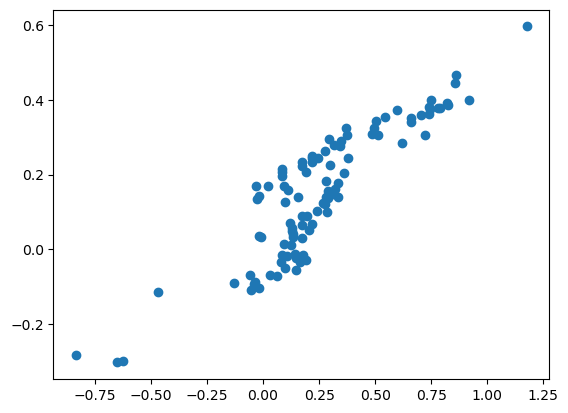

In [11]:
xpoints = projected_points[:100,0].squeeze()
ypoints = projected_points[:100,1].squeeze()
plt.scatter(xpoints,ypoints)

# ax.scatter(points_x, points_y, s=0.1)
# ax.set_xlim((-1, 1))
# ax.set_ylim((-1, 1))
# ax.set_axis_off()
# ax.set_aspect(1)

In [12]:
xpoints.shape

torch.Size([100])

In [13]:
projected_points.shape

torch.Size([1889, 2, 1])

In [14]:
camera_points.shape

torch.Size([1889, 3, 1])

In [15]:
camera_K.shape

torch.Size([3, 3])

In [16]:
camera_K

tensor([[1., 2., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [17]:
camera_K[...,:-1,:]/torch.tensor([2,2,2])

tensor([[0.5000, 1.0000, 0.0000],
        [0.0000, 0.5000, 0.0000]])